In [169]:
import geopandas as gpd

In [170]:
import pandas as pd

In [171]:
import numpy as np

In [172]:
import fiona

In [173]:
import plotly.express as px

In [174]:
import json

In [175]:
import folium

In [176]:
import matplotlib.pyplot as plt

In [177]:
from shapely.geometry import Point

In [178]:
from urllib.request import urlopen

In [179]:
from shapely import wkt

In [180]:
education_df = pd.read_csv('CAN_DSSI/STATE_OF_ILLINOIS_PROJ/Datasets/education_demographics.csv')
education_df.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry
0,17047957100,"Census Tract 9571, Edwards County, Illinois",17502924,151254,1397,132,1265,725,198,51,10,10,"POLYGON ((-88.102444 38.393512, -88.102316 38...."
1,17047956900,"Census Tract 9569, Edwards County, Illinois",289722767,430838,1469,121,1348,889,172,56,17,15,"POLYGON ((-88.148568 38.467818, -88.148557 38...."
2,17167003901,"Census Tract 39.01, Sangamon County, Illinois",107283391,1202385,3750,55,3695,2842,1731,641,96,27,"POLYGON ((-89.59191 39.692464, -89.591155 39.6..."
3,17167003500,"Census Tract 35, Sangamon County, Illinois",548131091,280907,3229,261,2968,2159,914,316,63,38,"POLYGON ((-89.994502 39.894466, -89.994507 39...."
4,17167003802,"Census Tract 38.02, Sangamon County, Illinois",71333933,955509,4576,357,4219,2566,1129,383,50,3,"POLYGON ((-89.567914 39.875799, -89.567394 39...."


In [181]:
names = list(education_df['qualifying name'])
split_names = []
for i in names:
    i = i.split(', ')
    split_names.append(i)

In [182]:
county = [i[1] for i in split_names]

In [183]:
county_names = []
for i in county:
    i = i.split(' County')
    county_names.append(i)

In [184]:
county_names =  [i[0] for i in county_names]

In [185]:
education_df['county'] = county_names

In [186]:
education_df.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry,county
0,17047957100,"Census Tract 9571, Edwards County, Illinois",17502924,151254,1397,132,1265,725,198,51,10,10,"POLYGON ((-88.102444 38.393512, -88.102316 38....",Edwards
1,17047956900,"Census Tract 9569, Edwards County, Illinois",289722767,430838,1469,121,1348,889,172,56,17,15,"POLYGON ((-88.148568 38.467818, -88.148557 38....",Edwards
2,17167003901,"Census Tract 39.01, Sangamon County, Illinois",107283391,1202385,3750,55,3695,2842,1731,641,96,27,"POLYGON ((-89.59191 39.692464, -89.591155 39.6...",Sangamon
3,17167003500,"Census Tract 35, Sangamon County, Illinois",548131091,280907,3229,261,2968,2159,914,316,63,38,"POLYGON ((-89.994502 39.894466, -89.994507 39....",Sangamon
4,17167003802,"Census Tract 38.02, Sangamon County, Illinois",71333933,955509,4576,357,4219,2566,1129,383,50,3,"POLYGON ((-89.567914 39.875799, -89.567394 39....",Sangamon


In [187]:
education_df['geometry'] = education_df['geometry'].apply(wkt.loads)
education_gdf = gpd.GeoDataFrame(education_df, crs='epsg:4326')

In [188]:
type(education_gdf)

geopandas.geodataframe.GeoDataFrame

In [189]:
county_education_lessthanHS_gdf = education_gdf.groupby('county')[["population 25 years and over: less than high school"]].mean()
county_education_lessthanHS_gdf.reset_index()

,county,population 25 years and over: less than high school
0,Adams,182.894737
1,Alexander,131.750000
2,Bond,336.250000
3,Boone,457.500000
4,Brown,446.500000
...,...,...
97,Whiteside,178.894737
98,Will,228.174419
99,Williamson,194.777778
100,Winnebago,287.425000


In [190]:
type(county_education_lessthanHS_gdf)

pandas.core.frame.DataFrame

In [191]:
agg_kwargs = {"numeric_only": None}

county_education_gdf_dissolved = education_gdf.dissolve(by='county',aggfunc='mean',**agg_kwargs)
county_education_gdf_dissolved.reset_index()

/Users/santi/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1780: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc, **kwargs)


,county,geometry,geoid,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree
0,Adams,"POLYGON ((-91.42371 39.91215, -91.42341 39.912...",1.700100e+10,1.165698e+08,2.197596e+06,2420.105263,182.894737,2237.210526,1392.052632,621.578947,209.105263,40.210526,12.947368
1,Alexander,"POLYGON ((-89.17242 37.01056, -89.17240 37.010...",1.700396e+10,1.524169e+08,1.115980e+07,954.750000,131.750000,823.000000,462.750000,117.000000,41.250000,14.250000,0.000000
2,Bond,"POLYGON ((-89.25668 38.91208, -89.25662 38.906...",1.700595e+10,2.462663e+08,1.615657e+06,2992.250000,336.250000,2656.000000,1677.000000,633.500000,252.750000,52.250000,38.500000
3,Boone,"POLYGON ((-88.94091 42.24713, -88.94091 42.247...",1.700701e+10,7.271146e+07,3.360626e+05,3541.300000,457.500000,3083.800000,1933.400000,879.500000,344.400000,102.900000,23.100000
4,Brown,"POLYGON ((-90.91709 39.88641, -90.91709 39.886...",1.700997e+10,3.959143e+08,2.072173e+06,2312.000000,446.500000,1865.500000,980.500000,300.500000,55.000000,9.500000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Whiteside,"POLYGON ((-90.18476 41.58943, -90.18421 41.589...",1.719500e+10,9.325310e+07,1.678092e+06,2068.105263,178.894737,1889.210526,1105.578947,389.368421,149.263158,25.315789,5.052632
98,Will,"POLYGON ((-88.19605 41.20245, -88.19894 41.202...",1.719788e+10,1.258667e+07,2.009877e+05,2677.843023,228.174419,2449.668605,1754.220930,947.127907,343.697674,71.494186,30.494186
99,Williamson,"POLYGON ((-89.15345 37.60928, -89.15343 37.610...",1.719902e+10,6.046327e+07,3.470584e+06,2663.888889,194.777778,2469.111111,1674.611111,709.111111,278.777778,81.888889,37.444444
100,Winnebago,"POLYGON ((-89.07722 42.15081, -89.07852 42.150...",1.720101e+10,1.660991e+07,1.984249e+05,2430.900000,287.425000,2143.475000,1382.262500,565.337500,200.850000,51.075000,15.012500


<Axes: >

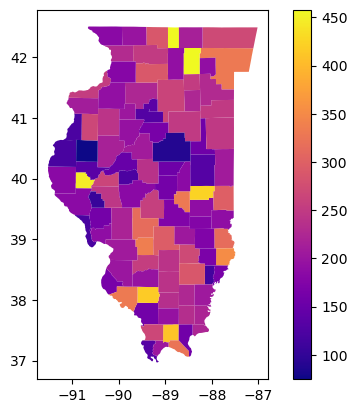

In [192]:
county_education_gdf_dissolved.plot(column="population 25 years and over: less than high school", legend=True, cmap='plasma')

In [193]:
county_education_BachelorPLUS = education_df.groupby('county')[["population 25 years and over: bachelor's degree or more"]].mean()
county_education_BachelorPLUS.reset_index()

,county,population 25 years and over: bachelor's degree or more
0,Adams,621.578947
1,Alexander,117.000000
2,Bond,633.500000
3,Boone,879.500000
4,Brown,300.500000
...,...,...
97,Whiteside,389.368421
98,Will,947.127907
99,Williamson,709.111111
100,Winnebago,565.337500


<Axes: >

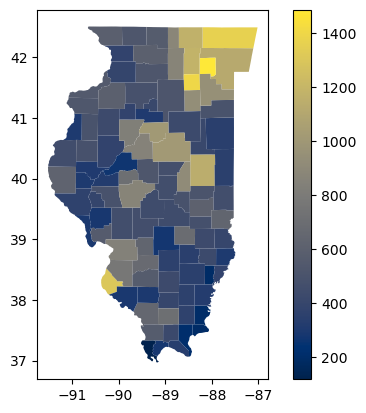

In [194]:
county_education_gdf_dissolved.plot(column="population 25 years and over: bachelor's degree or more", legend=True, cmap='cividis')

In [195]:
county_education_TradeSchoolPLUS = education_df.groupby('county')[["population 25 years and over: professional school degree or more"]].mean()
county_education_TradeSchoolPLUS.reset_index()

,county,population 25 years and over: professional school degree or more
0,Adams,40.210526
1,Alexander,14.250000
2,Bond,52.250000
3,Boone,102.900000
4,Brown,9.500000
...,...,...
97,Whiteside,25.315789
98,Will,71.494186
99,Williamson,81.888889
100,Winnebago,51.075000


<Axes: >

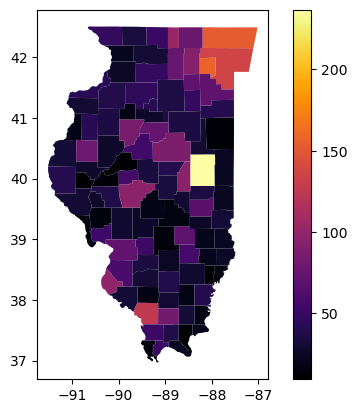

In [196]:
county_education_gdf_dissolved.plot(column="population 25 years and over: professional school degree or more", legend=True, cmap='inferno')

In [197]:
county_education_PHD = education_df.groupby('county')[["population 25 years and over: doctorate degree"]].mean()
county_education_PHD.reset_index()

,county,population 25 years and over: doctorate degree
0,Adams,12.947368
1,Alexander,0.000000
2,Bond,38.500000
3,Boone,23.100000
4,Brown,5.000000
...,...,...
97,Whiteside,5.052632
98,Will,30.494186
99,Williamson,37.444444
100,Winnebago,15.012500


<Axes: >

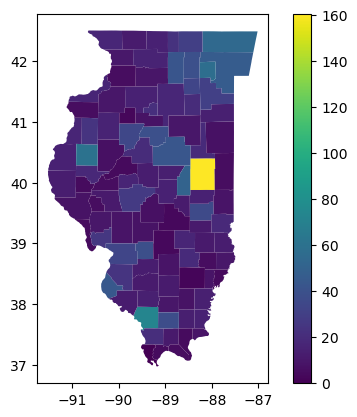

In [199]:
county_education_gdf_dissolved.plot(column="population 25 years and over: doctorate degree", legend=True, cmap='viridis')